In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta as ta
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from mom import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
df_dict = {}
candidate = ['SOL','XRP']#['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
for coin in candidate:
    try:
        df_dict[coin] = get_data(coin)
    except:
        pass

APY: 114.23 %
MDD: 19.47 %
MDD Duration 131 days 18:00:00
worst trade: -12.35 %
2022-11-12 10:00:00 ~ 2022-11-14 05:00:00
avg holding days: 3.76 days
--------------------------------------------
PF: 2.08
Sharpe Ratio: 1.76
Calmar Ratio: 4.33
Sortino Ratio: 2.77
Omega Ratio: 1.08
--------------------------------------------
Expectancy : 1.70 %
Total Time Exposure : 68.41 %
Total Trades: 124
Win Rate: 52.03 %
--------------------------------------------
PF * Win Rate: 1.084


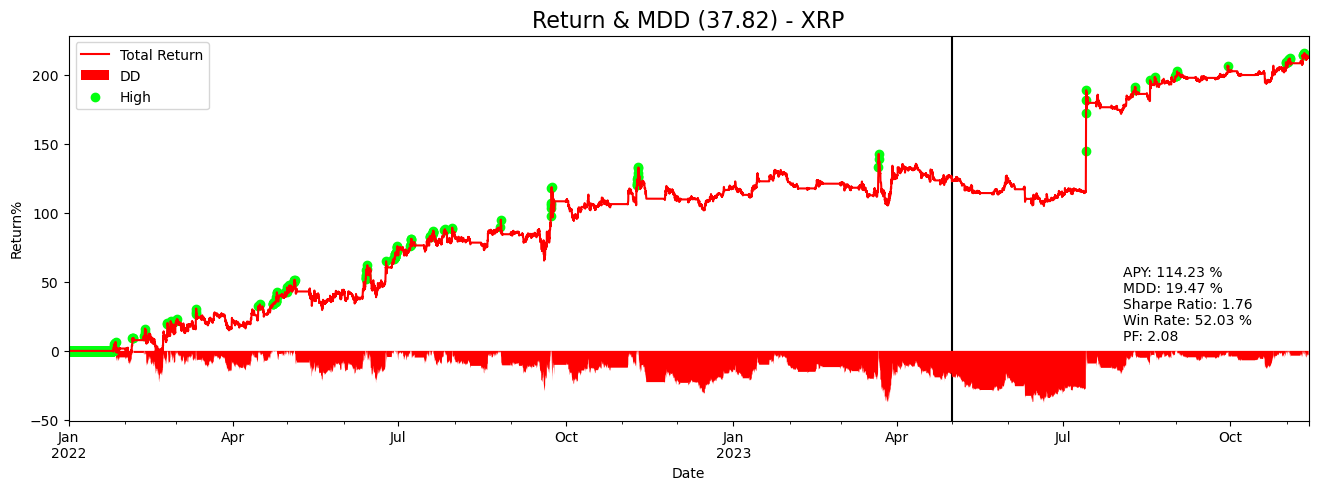

(None,
 Start                               2022-01-01 00:00:00
 End                                 2023-11-12 23:00:00
 Period                                681 days 00:00:00
 Start Value                                     10000.0
 Min Value                                   9356.115594
 Max Value                                  31601.334045
 End Value                                  31280.516896
 Total Return [%]                             212.805169
 Benchmark Return [%]                         -20.674452
 Total Time Exposure [%]                       68.410426
 Max Gross Exposure [%]                       117.133419
 Max Drawdown [%]                              19.467898
 Max Drawdown Duration                 131 days 18:00:00
 Total Orders                                        231
 Total Fees Paid                              743.272186
 Total Trades                                        124
 Win Rate [%]                                   52.03252
 Best Trade [%]         

In [59]:
start = '2022-01-01'
sep = ''
end = ''

side = 'both'
# v2
params = {'window_l_k': 80, 'window_l_d': 76, 'window_s_k': 104, 'window_s_d': 72}
# params = {'upper_bound': 90, 'rv_sum': 60, 'rv_rolling': 128}
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'XRP'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
# analyze.plot_ret_dist(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

<AxesSubplot:xlabel='Entry Index'>

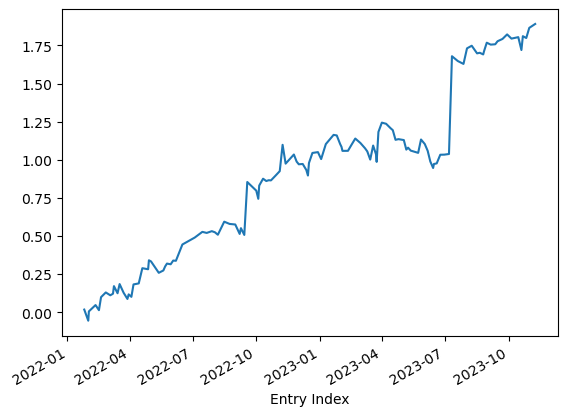

In [58]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL BOTH Optimize Test =======================
Optimization trails: 1575


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Pl

Optimization time: 52.59 sec
---------- SOL BOTH ----------
{'upper_bound': 90, 'rv_sum': 60, 'rv_rolling': 124}
APY: 221.56 %
MDD: 13.25 %
MDD Duration 70 days 14:00:00
worst trade: -15.16 %
2022-12-14 18:00:00 ~ 2022-12-18 02:00:00
avg holding days: 6.99 days
--------------------------------------------
PF: 5.52
Sharpe Ratio: 3.03
Calmar Ratio: 13.61
Sortino Ratio: 4.72
Omega Ratio: 1.16
--------------------------------------------
Expectancy : 8.92 %
Total Time Exposure : 47.44 %
Total Trades: 33
Win Rate: 54.55 %
--------------------------------------------
PF * Win Rate: 3.013


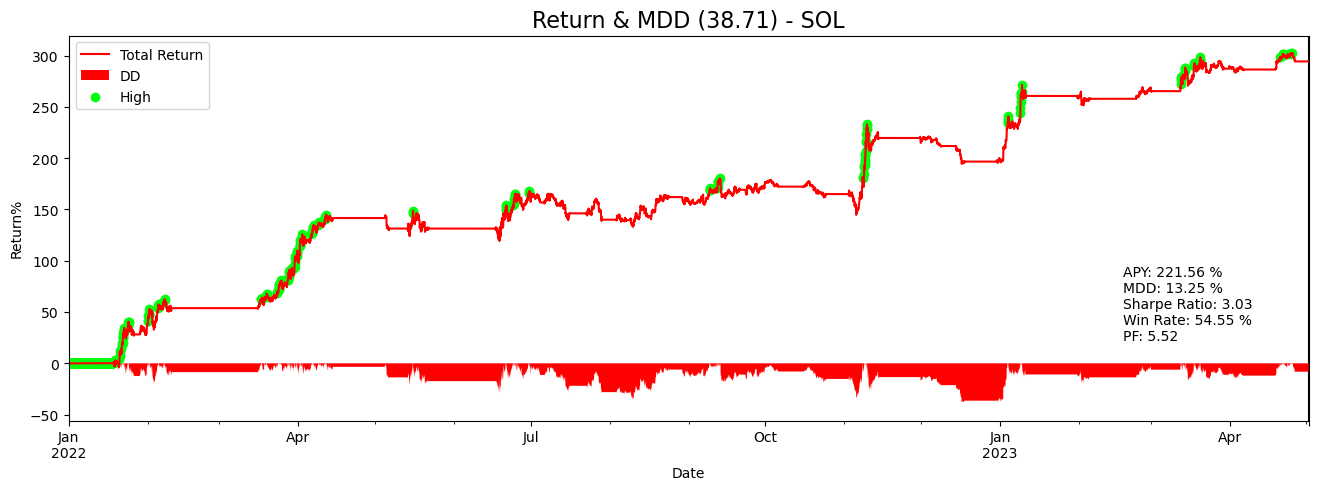

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |    120.12 | 12011.1  |     0    |     inf    |  100    |          3 |
| 2022-06    |     36.7  |  4699.21 | -1028.88 |       4.57 |   60    |          5 |
| 2022-09    |     15.48 |  3638.31 | -2090.79 |       1.74 |   54.55 |         11 |
| 2022-12    |     88.42 | 11865.9  | -3023.41 |       3.92 |   25    |          8 |
| 2023-03    |     25.77 |  2942.75 |  -365.81 |       8.04 |   60    |          5 |
| 2023-06    |      7.91 |   791.34 |     0    |     inf    |  100    |          1 |
+------------+-----------+----------+----------+------------+---------+------------+
-------------------1h is done----------------------


In [4]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['SOL'] #,'XRP']
sample_sets = [[start,end]]
freq = '1h'

# params={
#     'window_l_k': [36, 296, 4],
#     'window_l_d': [36, 296, 4],
#     'window_s_k': [36, 296, 4],
#     'window_s_d': [36, 296, 4]}

config = {'freq':freq,'fee': 0.0003}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(symbol_list,sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
print(f'-------------------{freq} is done----------------------')